# Gallery Tests

In [2]:
from ptm_pose import helpers

spliced_ptms, altered_flanks = helpers.load_example_data(spliced_ptms = True, altered_flanks = True)

## Overview of Spliced PTMs

### Inspecting identify PTMs

In [ ]:
from ptm_pose.analyze

In [4]:
from ptm_pose import project

In [1]:

from ptm_pose.analyze import summarize
from ptm_pose import helpers
import pandas as pd

# Load spliced ptm and altered flank data
spliced_ptms, altered_flanks = helpers.load_example_data(spliced_ptms = True, altered_flanks = True)

C:\Users\crowl\OneDrive\Documents\GradSchool\Research\Splicing\PTM_POSE\ptm_pose\pose_config.py:20: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  ptm_coordinates = pd.read_csv(resource_dir + 'ptm_coordinates.csv', dtype = {'Chromosome/scaffold name': str, 'PTM Position in Isoform': int})


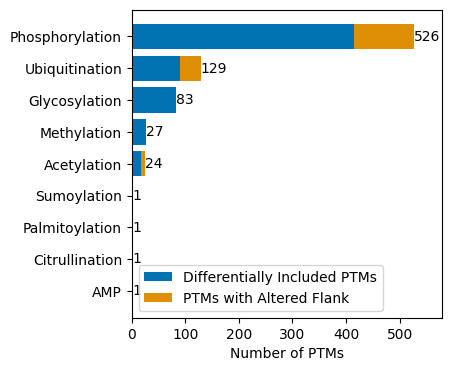

In [2]:
summarize.plot_modification_breakdown(spliced_ptms = spliced_ptms, altered_flanks = altered_flanks)

### Inspecting number of PTMs with annotation information available

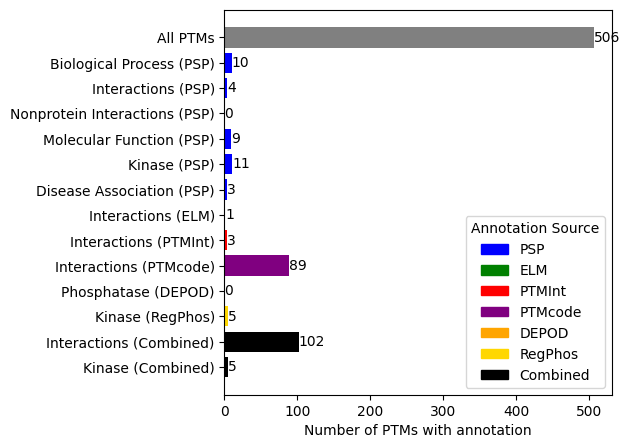

In [12]:
from ptm_pose.analyze import annotations
import pandas as pd

# Load spliced ptm and altered flank data
spliced_ptms = helpers.load_example_data(altered_flanks=False)

annotations.plot_available_annotations(spliced_ptms)

### Filter impact

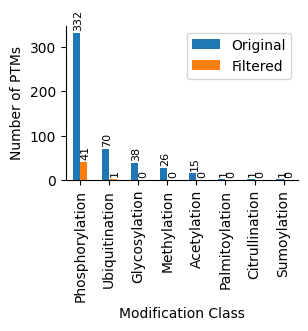

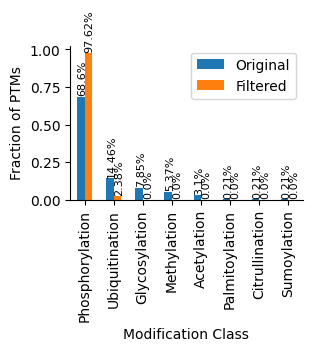

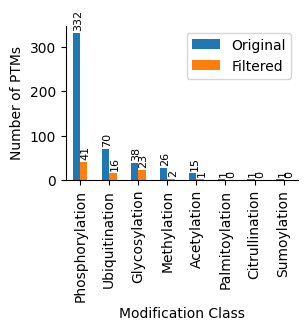

In [8]:
from ptm_pose import helpers
from ptm_pose.analyze import filter
import matplotlib.pyplot as plt


#load example differential inclusion and altered flank data
spliced_ptms = helpers.load_example_data(spliced_ptms = True)

# %%
# There are several ways to filter PTMs based on the parameter values below. Let's set these parameters so that we focus on PTMs that have been observed to impacted by splicing (remove_novel = True) and have been observed in at least 2 mass spectrometry experiments (min_experiments = 2). By default, the filter ptms will also remove any insignificant splice events with a dPSI value less than 0.1 (min_dpsi = 0.1, alpha = 0.05), but let's restrict that a little more to focus on events with changes of at least 20%.

remove_novel = True
min_MS_observations = 5
min_dpsi = 0.2

#other paramter values we could set to filter PTMs
alpha = 0.05 # p-value threshold for significance
min_studies = 0 # minimum number of literature publications that support the PTM (high and low throughput)


# %% 
# We can now assess the impact of these parameters on the number of PTMs, and type of PTMs, that are present in the dataset after filtering using the `filter.plot_filter_impact()` function

filter.plot_filter_impact(spliced_ptms, output_type = 'count', remove_novel = remove_novel, min_MS_observations = min_MS_observations, min_dpsi = min_dpsi, report_removed = False)

# %%
# Rather than the total number of PTMs, we can also assess how it impacts the proportion of PTMs that are present in the dataset. This is useful to see how the filtering parameters impact the type of PTMs that are present in the dataset, as more restrictive parameters may skew the dataset towards a particular type of PTM (e.g. phosphorylation).

filter.plot_filter_impact(spliced_ptms, output_type = 'fraction', remove_novel = remove_novel, min_MS_observations = min_MS_observations, min_dpsi = min_dpsi, report_removed = False)

# %%
# As you can see, this a pretty restrictive filter, and we are left with only a small number of PTMs (mostly phosphorylation). That may be useful for some analyses, but we may want to relax the parameters a little to include more PTMs. We could also choose to only filter out phosphoryation sites based on evidence, and keep all other PTMs regardless of the evidence (e.g. acetylation, methylation, etc.). This is not perfect, but as phosphorylation is the most commonly studied/measured PTM, it may be a good compromise to keep other PTMs that are not as well studied.

phospho_only_evidence_filter = True

filter.plot_filter_impact(spliced_ptms, output_type = 'count', remove_novel = remove_novel, min_MS_observations = min_MS_observations, min_dpsi = min_dpsi, report_removed = False, phospho_only_evidence_filter = phospho_only_evidence_filter)

# %% 
# Now you can see that there is the same number of phosphorylation sites, but now there are other modification types still present. 

## Annotation/Functional enrichment

### Inspecting Specific Annotation

Often, we will want to dig deeper into the specific functions, processes, interactions, etc. associated with the proteins in our dataset. First, we can look at the annotations currently available for analysis, based on annotations that have been appended using the annotate module:

In [1]:
from ptm_pose.analyze import annotations
from ptm_pose import helpers
import pandas as pd

# Load spliced ptm and altered flank data
spliced_ptms, altered_flanks = helpers.load_example_data(spliced_ptms=True, altered_flanks=True)
#combined_output = analyze.combine_outputs(spliced_ptms, altered_flanks)

annot_categories = annotations.get_available_annotations(spliced_ptms)
annot_categories

C:\Users\crowl\OneDrive\Documents\GradSchool\Research\Splicing\PTM_POSE\ptm_pose\pose_config.py:20: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  ptm_coordinates = pd.read_csv(resource_dir + 'ptm_coordinates.csv', dtype = {'Chromosome/scaffold name': str, 'PTM Position in Isoform': int})
c:\Users\crowl\miniconda3\envs\splicing\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Database,Annotation Type,Appended to PTM data?
0,DEPOD,Enzyme,No
1,iKiP,Enzyme,No
2,OmniPath,Eraser_Enzyme,No
3,OmniPath,Writer_Enzyme,No
4,PhosphoSitePlus,Disease,No
5,PhosphoSitePlus,Enzyme,No
6,PhosphoSitePlus,Function,No
7,PhosphoSitePlus,Interactions,No
8,PhosphoSitePlus,Perturbation,No
9,PhosphoSitePlus,Process,No


This will tell us what database information is available, the types of information from that database, and the column associated with that information. Let's take a closer look at the biological process information from PhosphoSitePlus:

In [2]:
ptms_with_annotation, annotation_counts = annotations.get_ptm_annotations(spliced_ptms, database = "PhosphoSitePlus", annotation_type = 'Process')
print('Specific PTMs with annotation:')
ptms_with_annotation

3 PTMs removed due to insignificant splice event (p < 0.05, dpsi >= 0.1): (33.33%)
Final number of PTMs to be assessed: 6
Specific PTMs with annotation:


,Gene,UniProtKB Accession,Residue,PTM Position in Isoform,Modification Class,PhosphoSitePlus:Function,dPSI,Significance,Impact
0,CEACAM1,P13688,S,461.0,Phosphorylation,"activity, inhibited",0.525,1.73943268451e-09,Included
1,SPHK2,Q9NRA0,S,419.0,Phosphorylation,intracellular localization,0.253,0.0129400018182,Included
2,SPHK2,Q9NRA0,S,421.0,Phosphorylation,intracellular localization,0.253,0.0129400018182,Included
3,TSC2,P49815,S,981.0,Phosphorylation,"molecular association, regulation;activity, in...",-0.219,4.18472157275e-05,Excluded
4,YAP1,P46937,K,342.0,Ubiquitination,protein degradation,-0.188;-0.161,4.17884655686e-07;0.000211254197372,Excluded


From this, we note a total of 9 impacted PTMs from 7 genes that have biological process information available. While we could manually look through to look for common processes, we can also inspect the annotation counts object to see the most common processes, including a breakdown by the type of impact (included [dPSI > 0], excluded [dPSI < 0], or altered flanking sequence):

In [3]:
print('Number of PTMs associated with each annotation:')
annotation_counts

Number of PTMs associated with each annotation:


,All Impacted,Included,Excluded
PhosphoSitePlus:Function,,,
intracellular localization,3,2.0,1
"activity, inhibited",2,1.0,1
"molecular association, regulation",1,0.0,1
protein degradation,1,0.0,1


Finally, you may prefer to visualize this information as a figure. Here, we can plot the top 10 most common biological processes for the included, excluded, and altered flanking sequence impacts. Notably, we can plot either the annotations as outputted above (includes directionality of PTM role) or we can collapse this information into similar groups (e.g. "cell motility, altered" and "cell motility, included" would be grouped as "cell motility"). Here, we will plot the full information on the left and the collapsed information on the right:

Text(0.5, 1.0, 'Collapsed Annotation')

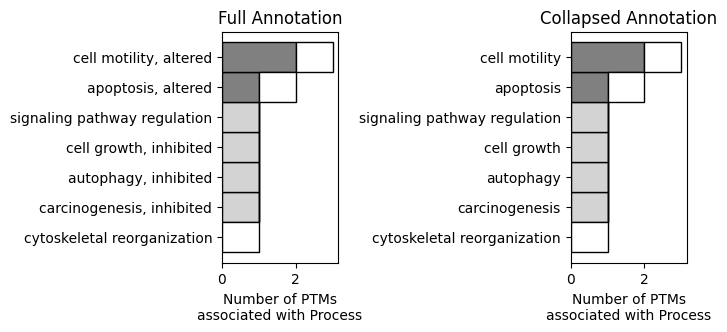

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols = 2, figsize = (6, 3))
fig.subplots_adjust(wspace = 2)
annotations.plot_annotation_counts(spliced_ptms = spliced_ptms, altered_flanks = altered_flanks, ax = ax[0], collapse_on_similar = False, database = 'PhosphoSitePlus', annot_type = 'Process', top_terms = 10)
ax[0].set_title('Full Annotation')
annotations.plot_annotation_counts(spliced_ptms = spliced_ptms, altered_flanks = altered_flanks,  ax = ax[1], collapse_on_similar = True, database = 'PhosphoSitePlus', annot_type = 'Process', top_terms = 10)
ax[1].set_title('Collapsed Annotation')

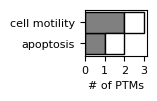

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (0.8,0.6))
annotations.plot_annotation_counts(spliced_ptms=spliced_ptms, altered_flanks = altered_flanks, ax = ax, collapse_on_similar = True, database = 'PhosphoSitePlus', annot_type = 'Process', top_terms = 2)
ax.set_xticks([0,1,2,3])
ax.tick_params(labelsize = 8)
ax.set_xlabel('# of PTMs', fontsize = 8)
ax.set_title('')
plt.savefig('../../annotation_counts_example.png', dpi = 300, bbox_inches = 'tight')

Of note, you can also choose to only show collapsed annotation information for `analyze.get_ptm_annotations()` by setting `collapse_on_similar=True` in the function call, like we have done for the plot on the right.

### Annotation Enrichment Analysis

In some cases, you may want to identify PTM-specific annotations that appear more commonly than might be expected based on how often the annotation appears across the entire proteome. We have provided a function to perform this analysis, `analyze.ptm_annotation_enrichment()`. By default, this function will compare the annotations found in your data to the annotations found in the entire proteome (based on ptm_coordinates dataframe), but you can also choose to perform enrichment analysis by significance. Here, we will we perform enrichment analysis using the entire proteome as the background. First, let's look at the available annotations for enrichment analysis:

In [3]:

from ptm_pose import analyze
import pandas as pd

# Load spliced ptm and altered flank data
spliced_ptms = pd.read_csv('spliced_ptms.csv')
altered_flanks = pd.read_csv('altered_flanks.csv')
combined_output = analyze.combine_outputs(spliced_ptms, altered_flanks)

annot_categories = analyze.get_annotation_categories(combined_output)
annot_categories

Some annotations in spliced ptms dataframe not found in altered flanks dataframe. These annotations will be ignored. To avoid this, make sure to add annotations to both dataframes, or annotate the combined dataframe.


,database,annotation_type,column
4,Combined,Interactions,Combined:Interactions
5,Combined,Kinase,Combined:Kinase
2,DEPOD,Phosphatase,DEPOD:Phosphatase
3,ELM,Interactions,ELM:Interactions
0,PhosphoSitePlus,Process,PSP:ON_PROCESS
1,PhosphoSitePlus,Interactions,PSP:ON_PROT_INTERACT
6,PhosphoSitePlus,Disease,PSP:Disease_Association
8,PhosphoSitePlus,Function,PSP:ON_FUNCTION
7,RegPhos,Kinase,RegPhos:Kinase


We would like to know if the PTMs have been implicated in any biological processes more than expected by chance. We can perform enrichment analysis on the biological process annotations from PhosphoSitePlus. To maximize the ability of the hypergeometric test to capture these results, we will use the collapsed annotation information (ignores directionality of PTM role):

In [4]:
enrichment = analyze.annotation_enrichment(combined_output, database = 'PhosphoSitePlus', annotation_type = 'Process', collapse_on_similar=True)
enrichment

Using pregenerated background information on all PTMs in the proteome.


,Fraction Impacted,p-value,Adjusted p-value,PTM
PSP:ON_PROCESS,,,,
cell motility,5/1078,0.052579,0.420633,ABI1_S392;CTTN_K272;CTTN_S298;SPHK2_S387;SPHK2...
cell adhesion,2/324,0.122466,0.489864,CTTN_S298;MPZL1_Y241
cell growth,4/1793,0.427134,1.000000,BCAR1_Y267;BCAR1_Y287;BCAR1_Y306;TSC2_S981
autophagy,1/306,0.434215,0.868429,TSC2_S981
cytoskeletal reorganization,2/796,0.435637,0.868429,ABI1_S392;CTTN_S298
apoptosis,2/1179,0.644065,0.868429,CEACAM1_S461;CEACAM1_T457
signaling pathway regulation,2/1206,0.656208,0.868429,BIN1_T348;TSC2_S981
carcinogenesis,2/1501,0.768091,0.868429,TSC2_S981;YAP1_K342


We can also plot the annotations and include which annotations are enriched (p-value < 0.05) in the plot:

In [ ]:


print('not yet implemented')

### Gene Set Enrichment Analysis

In addition to looking at the annotations associated with the PTMs, we can also look at the genes themselves with impacted PTMs. We can perform gene set enrichment analysis using EnrichR module of gseapy to identify if any gene sets are enriched in the PTM dataset, as well as break it down by the type of modication. Here, we will use the `analyze.gene_set_enrichment()` function to perform this analysis. First, let's look at the available gene sets for enrichment analysis:

In [ ]:
from ptm_pose import analyze, helpers


# Load spliced ptm and altered flank data
spliced_ptms, altered_flanks = helpers.load_example_data()


# %%
# Use the below function, we can identify enriched gene sets associated with spliced ptms, altered flanks, or both. We can also specify the gene sets to assess, alpha value for significance, the minimum change in PSI value to consider, and whether to return only significant gene sets.
genesets = analyze.gene_set_enrichment(spliced_ptms, altered_flanks, alpha = 0.05, min_dPSI = 0.1, gene_sets = ['GO_Biological_Process_2023','Reactome_2022'], return_sig_only = True)
genesets.head()

# %%
# You can then plot the enriched gene sets, including the proportion of genes associated with differentially included PTMs and those with altered flanking sequences. Here, let's restrict to looking at the top 5 enriched gene sets:
from ptm_pose import plots as pose_plots

pose_plots.plot_EnrichR_pies(genesets, top_terms = 5)

In [3]:
from ptm_pose import analyze
import pandas as pd

In [2]:
from ptm_pose import analyze
import pandas as pd

# Load spliced ptm and altered flank data
spliced_ptms = pd.read_csv('spliced_ptms.csv')
altered_flanks = pd.read_csv('altered_flanks.csv')
combined_output = analyze.combine_outputs(spliced_ptms, altered_flanks)

In [7]:
enrichr_results = analyze.gene_set_enrichment(combined = combined_output, gene_sets = ['GO_Biological_Process_2023', 'Reactome_2022'])

In [8]:
enrichr_results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,Type,Genes with Differentially Included PTMs only,Genes with PTM with Altered Flanking Sequence only,Genes with Both
0,GO_Biological_Process_2023,Regulation Of Neurogenesis (GO:0050767),5/67,0.000021,0.013841,0,0,16.840407,181.115793,YAP1;APLP2;DOCK7;NUMB;NF2,Differentially Included + Altered Flanking Seq...,YAP1,NF2,DOCK7;APLP2;NUMB
1,GO_Biological_Process_2023,Enzyme-Linked Receptor Protein Signaling Pathw...,6/124,0.000037,0.013841,0,0,10.700685,109.121813,CSF1;FGFR3;FGFR2;PTPRF;BCAR1;MPZL1,Differentially Included + Altered Flanking Seq...,FGFR2;FGFR3;CSF1,,MPZL1;BCAR1;PTPRF
2,GO_Biological_Process_2023,Protein Localization To Cell-Cell Junction (GO...,3/15,0.000053,0.013841,0,0,51.257732,504.811350,TJP1;LSR;SCRIB,Differentially Included + Altered Flanking Seq...,,LSR,SCRIB;TJP1
3,GO_Biological_Process_2023,Regulation Of Cell Migration (GO:0030334),10/434,0.000063,0.013841,0,0,5.103774,49.334196,TJP1;CEACAM1;CSF1;ADAM15;LIMCH1;APLP2;NUMB;ITG...,Differentially Included + Altered Flanking Seq...,ITGA6;CSF1,NF2,NUMB;APLP2;LIMCH1;ADAM15;BCAR1;CEACAM1;TJP1
4,GO_Biological_Process_2023,Integrin-Mediated Signaling Pathway (GO:0007229),5/85,0.000068,0.013841,0,0,13.039474,125.219775,CEACAM1;ADAM15;ITGA6;CD47;BCAR1,Differentially Included + Altered Flanking Seq...,ITGA6;CD47,,CEACAM1;BCAR1;ADAM15


The result is the standard output of gseapy, with the specific genes in the gene set with differentially include or altered flanking sequence PTM sites listed. We can also plot the output of the gene set enrichment analysis:

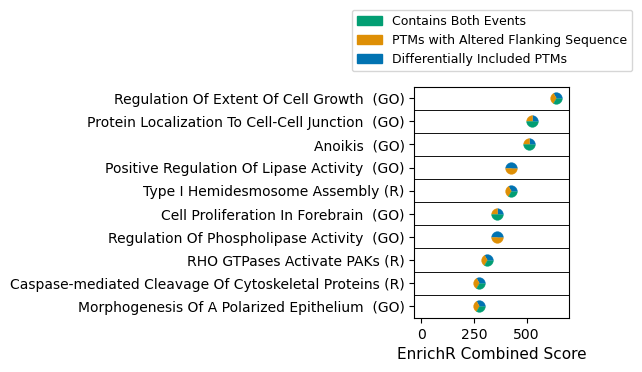

In [4]:
from ptm_pose import plots as pose_plots

pose_plots.plot_EnrichR_pies(enrichr_results, top_terms = 10)

## Networks

### Protein Interaction Networks

In [3]:
from ptm_pose import analyze
import pandas as pd

# Load spliced ptm and altered flank data
spliced_ptms = pd.read_csv('spliced_ptms.csv')

In [6]:
interactions = analyze.protein_interactions(spliced_ptms)
interactions.get_interaction_network()

PhosphoSitePlus regulatory site data found and added
Combined kinase-substrate data found and added
PTMInt data found and added
ELM data found and added


In [7]:
interactions.network_data.head()

,Modified Gene,Interacting Gene,Residue,Type,Source,dPSI,Regulation Change
0,ADAM15,HCK,Y715;Y735,REGULATES,PSP/RegPhos,-0.052;0.181,-;+
1,ADAM15,LCK,Y715,REGULATES,PSP/RegPhos,-0.052;0.181,-;+
2,ADAM15,SRC,Y715;Y735,REGULATES,PSP/RegPhos,-0.052;0.181,-;+
3,BCAR1,SRC,Y267;Y287,REGULATES,PSP/RegPhos,-0.07,-
4,BIN1,MAPT,T348,INDUCES,PTMInt;PhosphoSitePlus,-0.112,-


In [9]:
interactions.summarize_protein_network(protein = 'TSC2')

Decreased interaction likelihoods: AKT1, YWHAE, YWHAZ
Number of interactions: 3 (Rank: 2)
Centrality measures - 	 Degree = 0.2 (Rank: 2)
                      	 Betweenness = 0.028571428571428574 (Rank: 3)
                      	 Closeness = 0.2 (Rank: 3)


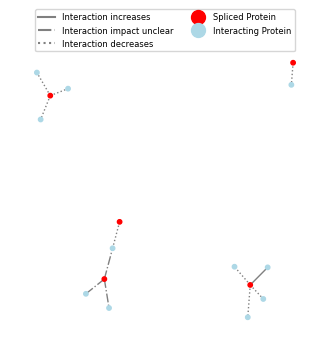

In [13]:
interactions.plot_interaction_network(interacting_node_size = 10)

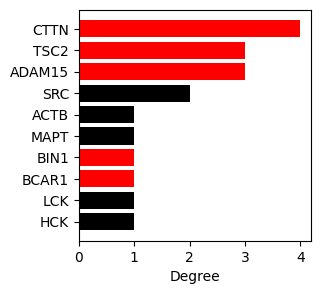

In [16]:
interactions.plot_network_centrality(centrality_measure='Degree')

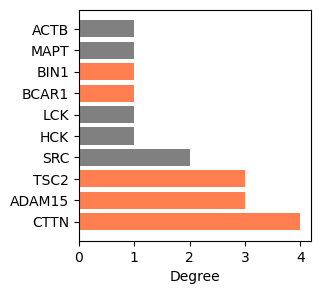

In [13]:
from ptm_pose import plots as pose_plots

network_stats = analyze.get_interaction_stats(interaction_graph)
pose_plots.plot_network_centrality(network_stats, network_data, top_N = 10, modified_color = 'coral', interacting_color = 'grey')

### KSEA Analysis

In [2]:
from ptm_pose.analyze import enzyme

In [5]:
ksea = enzyme.KSEA(spliced_ptms, database = 'PhosphoSitePlus')
#run KSEA for all available kinases
ksea.runKSEA()

Final number of PTMs to be assessed: 484


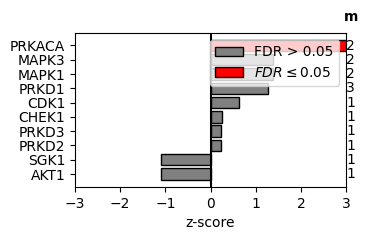

In [6]:
ksea.plot_results(show_substrate_count = True)


In [7]:
ksea = enzyme.KSEA(spliced_ptms, database = 'Combined Writer')
ksea.runKSEA()
ksea.plot_results(show_substrate_count = True)

Final number of PTMs to be assessed: 484
9 PTMs found with annotations from PhosphoSitePlus:Enzyme
4 PTMs found with annotations from RegPhos:Enzyme


FileNotFoundError: GMT file for OmniPath Writer Enzyme not found at c:\Users\crowl\miniconda3\envs\pose_install\Lib\site-packages\ptm_pose\Resource_Files\Annotations\OmniPath\Writer_Enzyme.gmt.gz. Please check the resource directory or set automatic_download=True to automatically create gmt file in provided resource directory.

### KSTAR Analysis

While we provide functions for performing enrichment of known kinase substrates from databases like PhosphoSitePlus, RegPhos, and PTMsigDB, these resources are limited by the overall number of validated substrates (<5%). For this purpose, we have adapted a previously developed algorithm called KSTAR (Kinase Substrate to Activity Relationships) for use with spliced PTM data, which harnesses kinase-substrate predictions to expand the overall number of phosphorylation sites that can be used as evidence. This particularly important as you may find many of the spliced PTMs in your dataset are less well studied and may not have any annotated kinases.

In order to perform KSTAR analysis, you will first need to download KSTAR networks from the following [figshare](https://figshare.com/articles/dataset/NETWORKS/14944305?file=28768155).

Once you have downloaded the networks, all you need is your PTM data.

In [46]:
import importlib
importlib.reload(enzyme)

<module 'ptm_pose.analyze.enzyme' from 'C:\\Users\\crowl\\OneDrive\\Documents\\GradSchool\\Research\\Splicing\\PTM_POSE\\ptm_pose\\analyze\\enzyme.py'>

In [30]:
from ptm_pose.analyze import enzyme
from ptm_pose import helpers
import pandas as pd

# Load spliced ptm and altered flank data
spliced_ptms = helpers.load_example_data(spliced_ptms = True)

In [47]:
kstar_enrichment = enzyme.kstar_enrichment(spliced_ptms, network_dir = '../../../../Database_Information/NETWORKS/NetworKIN/', phospho_type = 'Y')
kstar_enrichment.run_kstar_enrichment()
kstar_enrichment.return_enriched_kinases()

{'Y': array(['CSF1R', 'ERBB2', 'FYN', 'LCK', 'HCK'], dtype=object)}

In [28]:
import pandas as pd

<Axes: >

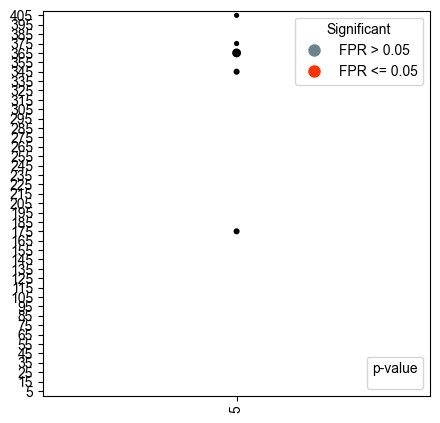

In [49]:
kstar_enrichment.dotplot(ptype = 'Y', sig_kinases_only=True)

You can also run the same analysis for serine/threonine kinases:

In [34]:
kstar_enrichment = analyze.kstar_enrichment(spliced_ptms, network_dir = '../../../../Database_Information/NETWORKS/NetworKIN/', phospho_type = 'ST')
kstar_enrichment.run_kstar_enrichment()
kstar_enrichment.return_enriched_kinases()

array(['PRKG2', 'MAPK14', 'PRKCH', 'PRKCG', 'PRKD1', 'PRKCE', 'ROCK1',
       'TTK'], dtype=object)

## Flanking Sequence Analysis

### Plot comparison between flanking sequences

For specific PTMs with altered flanking sequences, it can be useful to quickly visualize what changes occurred. We can do this quickly with  `plot.show_sequence_differences()`. All we have to do is input the inclusion and exclusion sequence for our sequence of interest. Let's say we want to look at how the flanking sequence changes for TSC2 S946 due to a skipped exon event. First, let's grab the flanking sequence information specific to the event, as well as the deltaPSI value.

In [1]:
import pandas as pd
altered_flanks = pd.read_csv('altered_flanks.csv')

#grab altered flanking sequence for TSC2 S946
flank_example = altered_flanks[(altered_flanks['Gene'] == 'TSC2') & (altered_flanks['PTM Position in Isoform'] == 946)].squeeze()
inclusion = flank_example['Inclusion Flanking Sequence']
exclusion = flank_example['Exclusion Flanking Sequence']

print(f'Inclusion Flanking Sequence: {inclusion}')
print(f'Exclusion Flanking Sequence: {exclusion}')

FileNotFoundError: [Errno 2] No such file or directory: 'altered_flanks.csv'

Now, to visualize this in easier to parse manner, we can input this into the `plot.show_sequence_differences()`. While not required, if we provide a dPSI value, the function will indicate the direction of change as well:

In [ ]:
from ptm_pose import plots as pose_plots

pose_plots.show_sequence_differences(inclusion, exclusion, dpsi=flank_example['dPSI'])

### Location of altered flanks

In [21]:
from ptm_pose import flanking_sequences as fs
from ptm_pose import analyze
import pandas as pd

# Load altered flank data
altered_flanks = pd.read_csv('altered_flanks.csv')

In [22]:
altered_flanks = analyze.compare_flanking_sequences(altered_flanks)
altered_flanks[['UniProtKB Accession', 'Residue', 'PTM Position in Canonical Isoform', 'Modification Class', 'Inclusion Flanking Sequence', 'Exclusion Flanking Sequence', 'Sequence Identity', 'Altered Positions', 'Residue Change', 'Altered Flank Side']].head()

,UniProtKB Accession,Residue,PTM Position in Canonical Isoform,Modification Class,Inclusion Flanking Sequence,Exclusion Flanking Sequence,Sequence Identity,Altered Positions,Residue Change,Altered Flank Side
0,P01116,T,148,Phosphorylation,ETSAKtRQESG,ETSAKtRQGC*,NaN,NaN,NaN,NaN
1,P01116,K,147,Acetylation,IETSAkTRQES,IETSAkTRQGC,0.818182,"[4.0, 5.0]","[E->G, S->C]",C-term only
2,P01116,K,147,Ubiquitination,IETSAkTRQES,IETSAkTRQGC,0.818182,"[4.0, 5.0]","[E->G, S->C]",C-term only
3,Q9UPQ0,S,746,Phosphorylation,LPNLNsQGVAW,LPNLNsQGGFS,0.727273,"[3.0, 4.0, 5.0]","[V->G, A->F, W->S]",C-term only
4,Q9UPQ0,S,750,Phosphorylation,PSQVDsPSSEK,ILKVDsPSSEK,0.727273,"[-5.0, -4.0, -3.0]","[P->I, S->L, Q->K]",N-term only


Note, we only calculate these metrics for cases where altered flanking sequences do not cause a stop codon to be introduced, as this is harder to interpret (such as for the first PTM in the list). The above table will indicate the positions in the flanking sequence that are altered, how similar the altered flanking sequence is to the original flanking sequence, and the specific residue change that takes place. We can also plot some of this information to get a better sense of the distribution of altered flanking sequences:

In [47]:
importlib.reload(pose_plots)

<module 'ptm_pose.plots' from 'C:\\Users\\Sam\\OneDrive\\Documents\\GradSchool\\Research\\Splicing\\PTM_POSE\\ptm_pose\\plots.py'>

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\Splicing\PTM_POSE\ptm_pose\plots.py:391: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['N-term\nonly', 'C-term\nonly'])


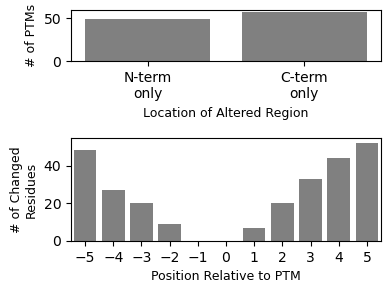

In [48]:
from ptm_pose import plots as pose_plots

pose_plots.location_of_altered_flanking_residues(altered_flanks)

We can even create the same plot for specific modification types or residues, as well as label the specific residue changes that occur:

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\Splicing\PTM_POSE\ptm_pose\plots.py:437: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['N-term\nonly', 'C-term\nonly'])


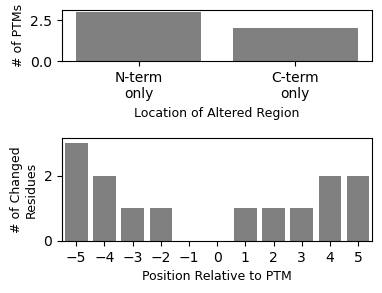

In [76]:
pose_plots.location_of_altered_flanking_residues(altered_flanks, modification_class='Acetylation')

If we want to dig deeper, we can look at the specific changes that occurring, although this is only recommended with a selected subset of PTMs, such as those that may have a functional impact:

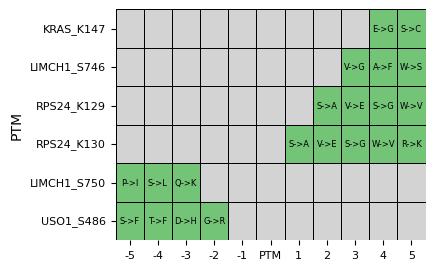

In [102]:
pose_plots.alterations_matrix(altered_flanks.head(10))

In [119]:
importlib.reload(analyze)

<module 'ptm_pose.analyze' from 'C:\\Users\\Sam\\OneDrive\\Documents\\GradSchool\\Research\\Splicing\\PTM_POSE\\ptm_pose\\analyze.py'>

In [120]:
altered_flanks = analyze.compare_inclusion_motifs(altered_flanks)

In [126]:
sh2_motif_changes = analyze.identify_change_to_specific_motif(altered_flanks, elm_motif_name = '14-3-3', modification_class = 'Phosphorylation', residues = ['S','T'])

In [127]:
sh2_motif_changes

,Gene,UniProtKB Accession,Residue,PTM Position in Canonical Isoform,Modification Class,Inclusion Sequence,Exclusion Sequence,Motif only in Inclusion,Motif only in Exclusion,Altered Positions,Residue Change
22,MLPH,Q9BV36,S,337,Phosphorylation,RGRASsESQDL,RGRASsESQGS,LIG_14-3-3_CanoR_1,NaN,"[4.0, 5.0]","[D->G, L->S]"
23,MLPH,Q9BV36,S,339,Phosphorylation,RASSEsQDL*A,RASSEsQGSRC,LIG_14-3-3_CanoR_1,NaN,NaN,NaN
50,CEACAM1,P13688,T,457,Phosphorylation,LHFGKtGRGKR,LHFGKtGRLRT,NaN,LIG_14-3-3_CterR_2,"[3.0, 4.0, 5.0]","[G->L, K->R, R->T]"
67,ENAH,Q8N8S7,S,512,Phosphorylation,KSPVIsRTGFS,KSPVIsRTKIH,LIG_14-3-3_CterR_2,NaN,"[3.0, 4.0, 5.0]","[G->K, F->I, S->H]"
93,LMO7,Q8WWI1-3,S,356,Phosphorylation,ADGTFsRTLSK,ADGTFsRE*VH,LIG_14-3-3_CterR_2,NaN,NaN,NaN
129,MAP3K7,O43318,T,403,Phosphorylation,RIAATtGLFQA,RIAATtGQRTA,LIG_14-3-3_CanoR_1,NaN,"[2.0, 3.0, 4.0]","[L->Q, F->R, Q->T]"
141,LMO7,Q8WWI1-3,T,354,Phosphorylation,TEADGtFSR*S,TEADGtFSRE*,LIG_14-3-3_CterR_2,NaN,NaN,NaN


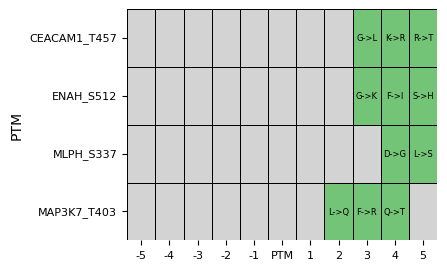

In [128]:
pose_plots.alterations_matrix(sh2_motif_changes)

### 14-3-3 motifs


A potential consequence of altered flanking sequences is that the short linear motifs important for driving PTM-specific domain interactions are disrupted, such as for the phosphotyrosine binding domains SH2 or 14-3-3 proteins (which bind to phosphoserines and threonines). Using PTM-POSE and motif data from [ELM](http://elm.eu.org/searchdb.html), we can identify and visualize the altered 14-3-3 domain motifs due to splicing events.

In [1]:

from ptm_pose import analyze, helpers

#load example altered flanking sequence data
altered_flanks = helpers.load_example_data(spliced_ptms = False)

C:\Users\crowl\OneDrive\Documents\GradSchool\Research\Splicing\PTM_POSE\ptm_pose\pose_config.py:20: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  ptm_coordinates = pd.read_csv(resource_dir + 'ptm_coordinates.csv', dtype = {'Chromosome/scaffold name': str, 'PTM Position in Isoform': int})


First, we need to identify the linear motifs present for each altered flanking sequence event. We can do this with the `compare_inclusion_motifs` function, which will identify matching any matching motifs for both the inclusion and exclusion flanking sequences. 

In [2]:
altered_flanks = analyze.compare_inclusion_motifs(altered_flanks)
altered_flanks[['Gene', 'Residue', 'PTM Position in Isoform', 'Motif only in Inclusion', 'Motif only in Exclusion']].head()

,Gene,Residue,PTM Position in Isoform,Motif only in Inclusion,Motif only in Exclusion
0,ARHGAP17,S,497,LIG_WD40_WDR5_VDV_2;LIG_PDZ_Class_2;DOC_MAPK_g...,LIG_SH3_3;LIG_SH3_1
1,ARHGAP17,S,497,LIG_WD40_WDR5_VDV_2;LIG_PDZ_Class_2;DOC_MAPK_g...,LIG_SH3_3;LIG_SH3_1
2,KRAS,T,148,TRG_ER_diArg_1,
3,KRAS,K,147,TRG_ER_diArg_1,
4,KRAS,K,147,TRG_ER_diArg_1,


We can then identify the instances in which 14-3-3 motifs are altered:

In [3]:
fourteen33_motifs = analyze.identify_change_to_specific_motif(altered_flanks, elm_motif_name = '14-3-3', modification_class = 'Phosphorylation', residues = ['S','T'])
fourteen33_motifs[['Gene', 'Residue', 'PTM Position in Isoform', 'Motif only in Inclusion', 'Motif only in Exclusion']]

,Gene,Residue,PTM Position in Isoform,Motif only in Inclusion,Motif only in Exclusion
23,MLPH,S,336,LIG_14-3-3_CanoR_1,NaN
52,CEACAM1,T,457,LIG_14-3-3_CterR_2,NaN
68,ENAH,S,512,NaN,LIG_14-3-3_CterR_2
85,TSC2,S,946,NaN,LIG_14-3-3_CterR_2
95,LMO7,S,356,NaN,LIG_14-3-3_CterR_2
146,LMO7,S,356,NaN,LIG_14-3-3_CterR_2


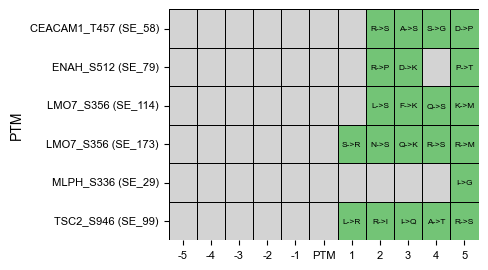

In [6]:
from ptm_pose import plots as pose_plots
pose_plots.alterations_matrix(fourteen33_motifs)

In [ ]:
modification_class = 'Phosphorylation'
residue = None
# extract altered flanking sequences and make sure there is altered position data
position_breakdown = altered_flanks.copy()
if 'Altered Positions' not in position_breakdown.columns:
    position_breakdown = fs.compare_flanking_sequences(position_breakdown)

position_breakdown = position_breakdown.dropna(subset = ['Altered Positions', 'Residue Change'])

#restrit to desired PTM types and residues
if modification_class is not None:
    position_breakdown = position_breakdown[position_breakdown['Modification Class'].str.contains(modification_class)].copy()
if residue is not None:
    position_breakdown = position_breakdown[position_breakdown['Residue'] == residue].copy()

#add ptm column to position breakdown
position_breakdown['PTM'] = position_breakdown['Gene'] + '_' + position_breakdown['Residue'] + position_breakdown['PTM Position in Isoform'].astype(str) + "(" + position_breakdown['Region ID'] + ')'

### Kinase library analysis

In [4]:
from ptm_pose.analyze import enzyme

In [5]:
# initialize the kinase library class
klibrary = enzyme.KL_flank_analysis(altered_flanks, min_dpsi = 0.4)

89 PTMs removed due to insignificant splice event (p < 0.05, dpsi >= 0.4): (86.41%)
Final number of PTMs to be assessed: 14


In [12]:
klibrary.altered_flanks

,Region ID,Gene,Residue,PTM Position in Isoform,Inclusion Flanking Sequence,Exclusion Flanking Sequence,dPSI
0,SE_1,ARHGAP17,S,497,LVKKEsFGVKL,LVKKEsPPKPK,0.413
1,SE_13,USO1,S,483,CTNILsQGDKI,CTNILsQGSKI,-0.535
2,SE_13,USO1,S,486,IDRRGsKIQTR,ILSQGsKIQTR,-0.535
3,SE_19,CCDC50,Y,146,ADSYYyEDGDQ,ADSYYyEDGGM,-0.513
4,SE_22,MYO1B,T,793,AYWHGtQARRE,AYWHGtQVRRE,0.471
5,SE_23,MYO1B,T,793,AYWHGtQARRE,AYWHGtQVRRE,0.430
6,SE_25,CD44,T,222,DRIPAtNRNDV,DRIPAtRDQDT,-0.539
7,SE_26,CD44,T,222,DRIPAtSTSSN,DRIPAtRDQDT,-0.680
8,SE_27,CD44,T,222,DRIPAtNMDSS,DRIPAtRDQDT,-0.544
9,SE_37,INF2,S,1229,KRPSRsQEEHS,KRPSRsQEGLR,-0.508


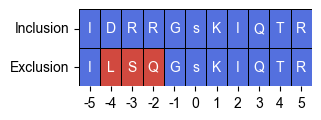

In [14]:
gene = 'USO1'
loc = 486
example = altered_flanks[(altered_flanks['Gene'] == gene) & (altered_flanks['PTM Position in Isoform'] == loc)].squeeze()

from ptm_pose.analyze import flank_analysis

flank_analysis.plot_sequence_differences(example['Inclusion Flanking Sequence'], example['Exclusion Flanking Sequence'])

In [15]:
klibrary.analyze_single_ptm(gene, loc).head(10)

,Inclusion percentile,Exclusion percentile,Difference,Absolute Difference,dPSI,Relative Change in Preference
PIM3,90.83,12.73,78.10,78.10,-0.535,-41.78350
CLK2,85.76,8.49,77.27,77.27,-0.535,-41.33945
DAPK2,97.76,21.99,75.77,75.77,-0.535,-40.53695
PASK,94.11,20.02,74.09,74.09,-0.535,-39.63815
RSK4,96.46,22.63,73.83,73.83,-0.535,-39.49905
CLK4,95.68,23.23,72.45,72.45,-0.535,-38.76075
P70S6KB,95.19,22.89,72.30,72.30,-0.535,-38.68050
AURA,96.75,26.18,70.57,70.57,-0.535,-37.75495
DAPK3,96.31,25.75,70.56,70.56,-0.535,-37.74960
DAPK1,96.32,26.14,70.18,70.18,-0.535,-37.54630


In [16]:
klibrary.analyze_all_ptms()

Score sequences for inclusion isoforms
Scoring 12 ser_thr substrates
Calculating percentile for 12 ser_thr substrates
100%|██████████| 310/310 [00:02<00:00, 122.88it/s] 
                                                  
Scoring 1 tyrosine substrates
Calculating percentile for 1 tyrosine substrates
100%|██████████| 78/78 [00:00<00:00, 1520.09it/s]
                                                 

Scoring sequences for exclusion isoforms
Scoring 12 ser_thr substrates
Calculating percentile for 12 ser_thr substrates
100%|██████████| 310/310 [00:02<00:00, 114.62it/s] 
                                                  
Scoring 1 tyrosine substrates
Calculating percentile for 1 tyrosine substrates
100%|██████████| 78/78 [00:00<00:00, 2262.30it/s]
                                                 


In [ ]:
klibrary.score_all_ptms()

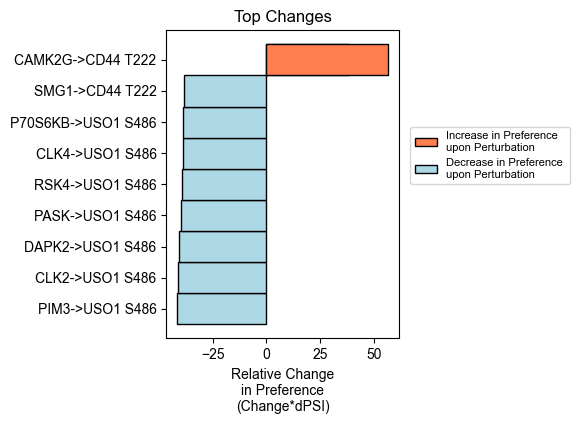

In [17]:
klibrary.plot_top_changes()

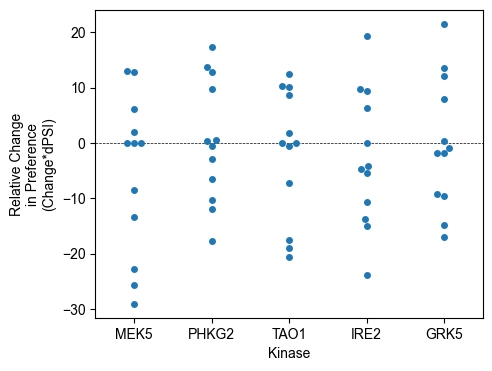

In [18]:
klibrary.plot_top_kinases(top_n = 5)


## Plot Event